Для анализа нам была предложена библиотека `scipy.optimize`. В ней присутствует множество методов для минимизации функций, однако наиболее похожим на градиентный спуск, реализованный нами, мы считаем метод `CG`. Для поиска длины шага он использует правило Вольфе (тем интереснее будет сравнивать, ведь мы тоже его реализовали. Для начала посмотрим на графики:

In [3]:
def pretty_print(descent: GradientDecent, name: str, find_result: float):
    print(name, ": find min value: ", find_result)
    print(name, ": find min value in: ", descent.get_path()[-1])
    print(name, ": steps count: ", len(descent.get_path()))

simpy : find min value:  -0.9999999999999998
simpy : find min value in:  [-8.909149196156818e-09, -4.332118830330245e-09]
simpy : steps count:  4
wolfe : find min value:  -0.9999999999999992
wolfe : find min value in:  [-8.909149196156818e-09, -4.332118830330245e-09]
wolfe : steps count:  4


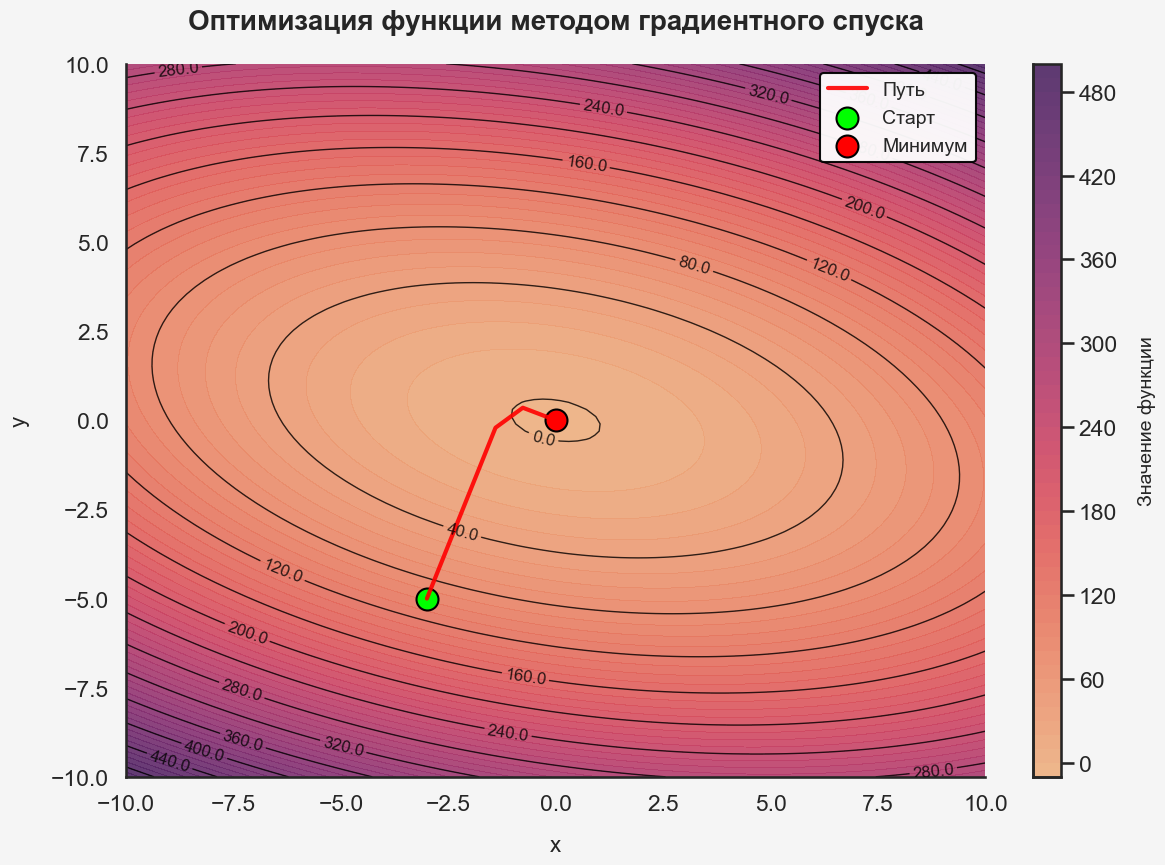

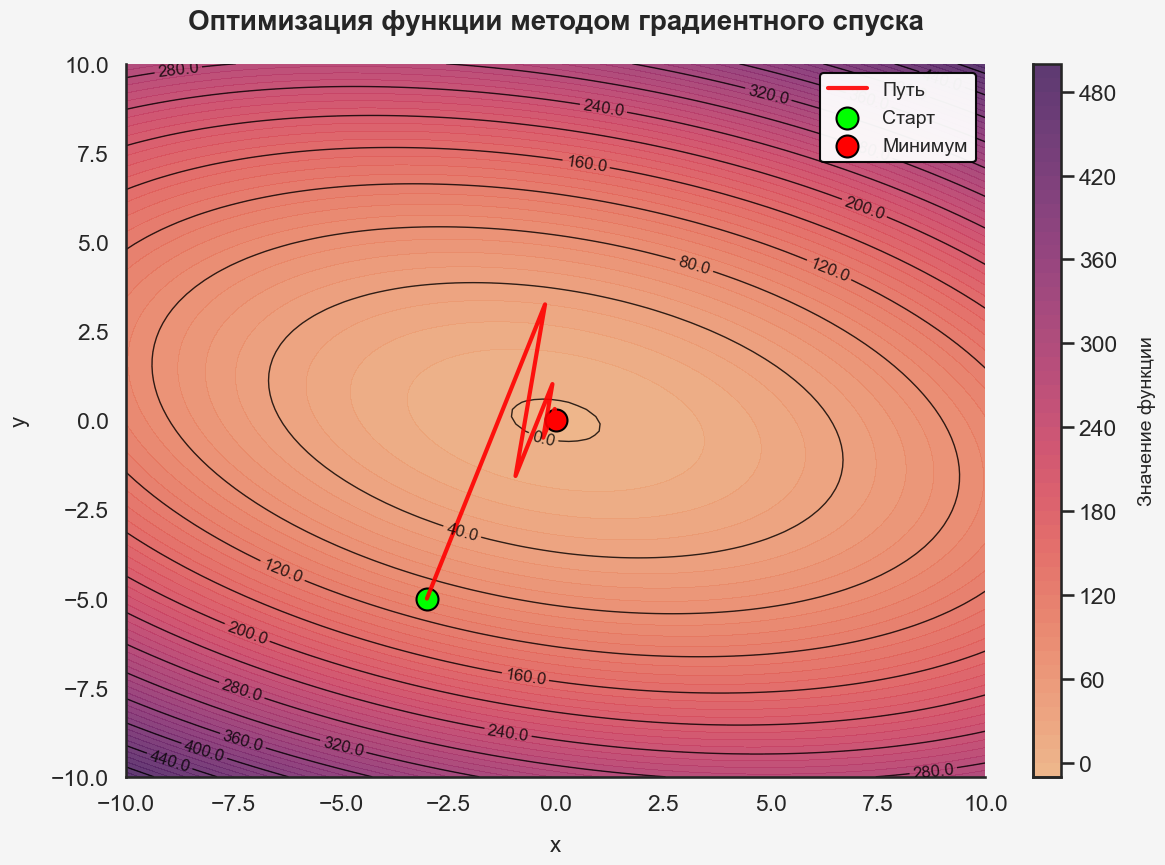

In [5]:
from gradient_descent import GradientDecent, SimpyWrapper
from graphics_plotter import GraphicsPlotter
from lrs import wolfe

func = lambda x: x[0] ** 2 + 3 * x[1] ** 2 + x[1] * x[0] - 1
    
bounds=[[-10, 10], [-10, 10]]
descent1 = SimpyWrapper(func, bounds)
descent2 = GradientDecent(wolfe(0.0001, 0.4), func, bounds, 1e-9)

plotter1 = GraphicsPlotter(descent1)
plotter2 = GraphicsPlotter(descent2)

point=[-3, -5]
iterations=1000

pretty_print(descent1, "simpy", descent1.find_min(point, iterations))
pretty_print(descent1, "wolfe", descent2.find_min(point, iterations))

plotter1.plot()
plotter2.plot()

В данном сравнении видно, что наш метод почти не уступает библиотечному в точности, мы проиграли лишь: `0.0000000000000006` в точности. Примечательно, что несмотря на разный путь пройденный методами, мы имеем одинаковое количество итераций и почти эквивалентные результаты. Дальше посмотрим на табличку сравнения результатов нашего метода и библиотечного:
(Важно, что в этом сравнении можно рассмотривать только функции с конечным минимумом, т.к библиотечный метод не умеет работать с границами, и считает минимум на всей области)

In [7]:
from gradient_descent import GradientDecent, SimpyWrapper
from lrs import wolfe

func = lambda x: x[0] ** 2 + 3 * x[1] ** 2 + x[1] * x[0] - 1
    
bounds=[[-6, 6], [-6, 6]]
descent = SimpyWrapper(func, bounds)
descent2 = GradientDecent(wolfe(0.0001, 0.4), func, bounds)

point=[-3, -5]

print('{:12}| {:20}| {:20}|'.format('point', 'scipy', 'own'))
print(''.join(['-'*57]))
iter=10000
for i in range(15):
    point[0] += 0.5
    point[1] += 0.4
    print('{:12}| {:20}| {:20}|'.format(
            '[{:.2}, {:.2}]'.format(point[0], point[1]), 
            str(descent.find_min(point, iter)), 
            str(descent2.find_min(point, iter))
        )
    )

point       | scipy               | own                 |
---------------------------------------------------------
[-2.5, -4.6]| -1.0                | -0.9999999999388893 |
[-2.0, -4.2]| -0.9999999999997522 | -0.9999999999508586 |
[-1.5, -3.8]| -0.999999999999479  | -0.999999999876572  |
[-1.0, -3.4]| -0.9999999999999997 | -0.9999999999059184 |
[-0.5, -3.0]| -0.9999999999999982 | -0.9999999999307869 |
[0.0, -2.6] | -0.9999999999999964 | -0.9999999999511776 |
[0.5, -2.2] | -0.9999999999999993 | -0.9999999998946901 |
[1.0, -1.8] | -0.9999999999999997 | -0.9999999999312829 |
[1.5, -1.4] | -1.0                | -0.999999999851349  |
[2.0, -1.0] | -0.9999999999999998 | -0.9999999999075554 |
[2.5, -0.6] | -0.9999999999999986 | -0.9999999999219028 |
[3.0, -0.2] | -0.9999999999999863 | -0.9999999999129788 |
[3.5, 0.2]  | -0.9999999999999873 | -0.9999999998993123 |
[4.0, 0.6]  | -0.9999999999999973 | -0.9999999998499316 |
[4.5, 1.0]  | -0.9999999999999284 | -0.9999999999331943 |


Данная таблица чуть более показательна, на ней видно, что наш метод чуть менее точно находит минимумы в точках. Однако, мы предусмотрели необходимость разной точности, и в сигнатуре нашего метода (в отличие от библиотечного) можно настроить точность получения ответа. По умолчанию она равна `0.00001`, но её можно уменьшить:

In [8]:
from gradient_descent import GradientDecent, SimpyWrapper
from lrs import wolfe

func = lambda x: x[0] ** 2 + 3 * x[1] ** 2 + x[1] * x[0] - 1
    
bounds=[[-6, 6], [-6, 6]]
descent = SimpyWrapper(func, bounds)
descent2 = GradientDecent(wolfe(0.0001, 0.4), func, bounds, 1e-9)

point=[-3, -5]

print('{:12}| {:20}| {:20}|'.format('point', 'scipy', 'own'))
print(''.join(['-'*57]))
iter=10000
for i in range(15):
    point[0] += 0.5
    point[1] += 0.4
    print('{:12}| {:20}| {:20}|'.format(
            '[{:.2}, {:.2}]'.format(point[0], point[1]), 
            str(descent.find_min(point, iter)), 
            str(descent2.find_min(point, iter))
        )
    )

point       | scipy               | own                 |
---------------------------------------------------------
[-2.5, -4.6]| -1.0                | -0.9999999999999998 |
[-2.0, -4.2]| -0.9999999999997522 | -0.9999999999999998 |
[-1.5, -3.8]| -0.999999999999479  | -0.9999999999999999 |
[-1.0, -3.4]| -0.9999999999999997 | -0.9999999999999997 |
[-0.5, -3.0]| -0.9999999999999982 | -0.9999999999999998 |
[0.0, -2.6] | -0.9999999999999964 | -0.9999999999999999 |
[0.5, -2.2] | -0.9999999999999993 | -0.9999999999999998 |
[1.0, -1.8] | -0.9999999999999997 | -0.9999999999999991 |
[1.5, -1.4] | -1.0                | -0.9999999999999997 |
[2.0, -1.0] | -0.9999999999999998 | -0.9999999999999998 |
[2.5, -0.6] | -0.9999999999999986 | -0.9999999999999999 |
[3.0, -0.2] | -0.9999999999999863 | -1.0                |
[3.5, 0.2]  | -0.9999999999999873 | -0.9999999999999998 |
[4.0, 0.6]  | -0.9999999999999973 | -0.9999999999999997 |
[4.5, 1.0]  | -0.9999999999999284 | -1.0                |


На данной таблице уже видно, что наш спуск выдаёт даже более точные результаты, а это значит, что точность подсчёта ответа - это неплохой гипер-параметр. Да он замедляет работу метода, и с большей точностью требуется больше итераций, но результат оправдывает все ожидания.

Также интересно сравнить работу наших методов на одномерных функциях

simpy : find min value:  -4.999999999999632
simpy : find min value in:  [-1.999999393260416]
simpy : steps count:  2
wolfe : find min value:  -4.999999999999999
wolfe : find min value in:  [-1.999999393260416]
wolfe : steps count:  2


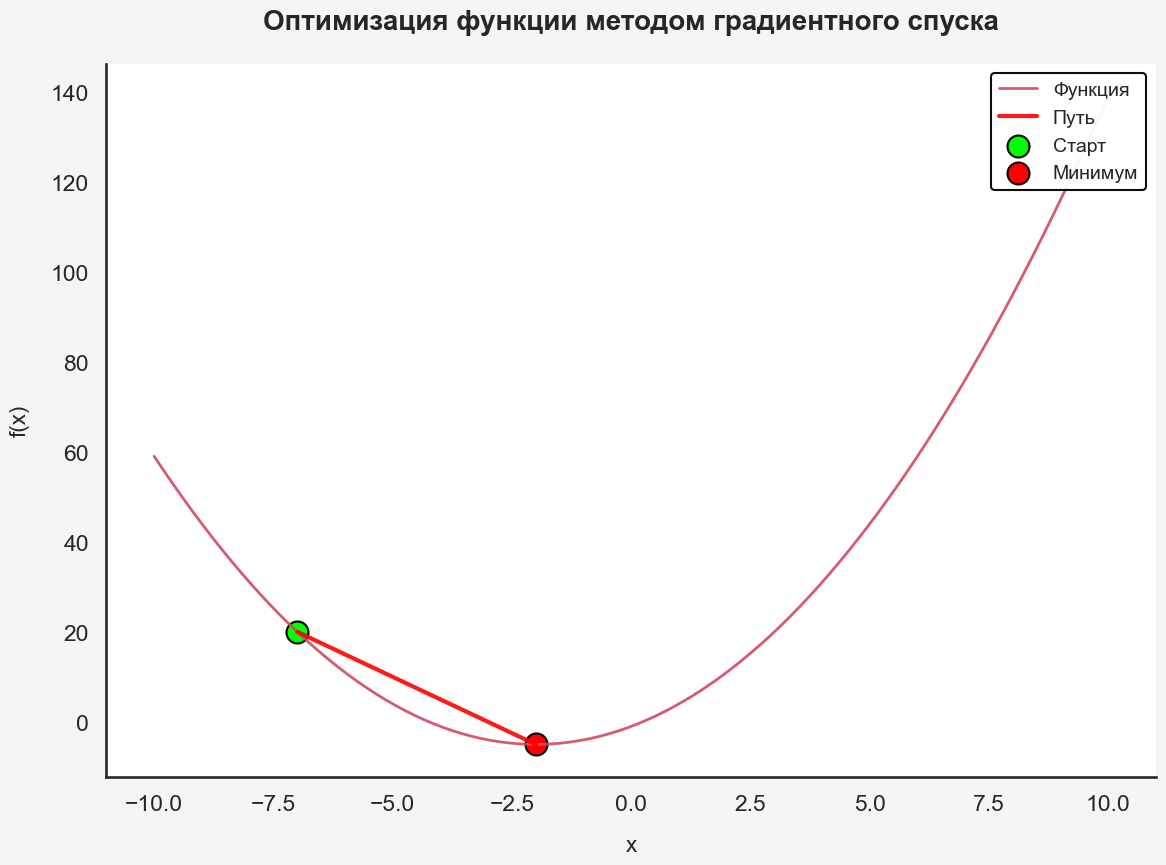

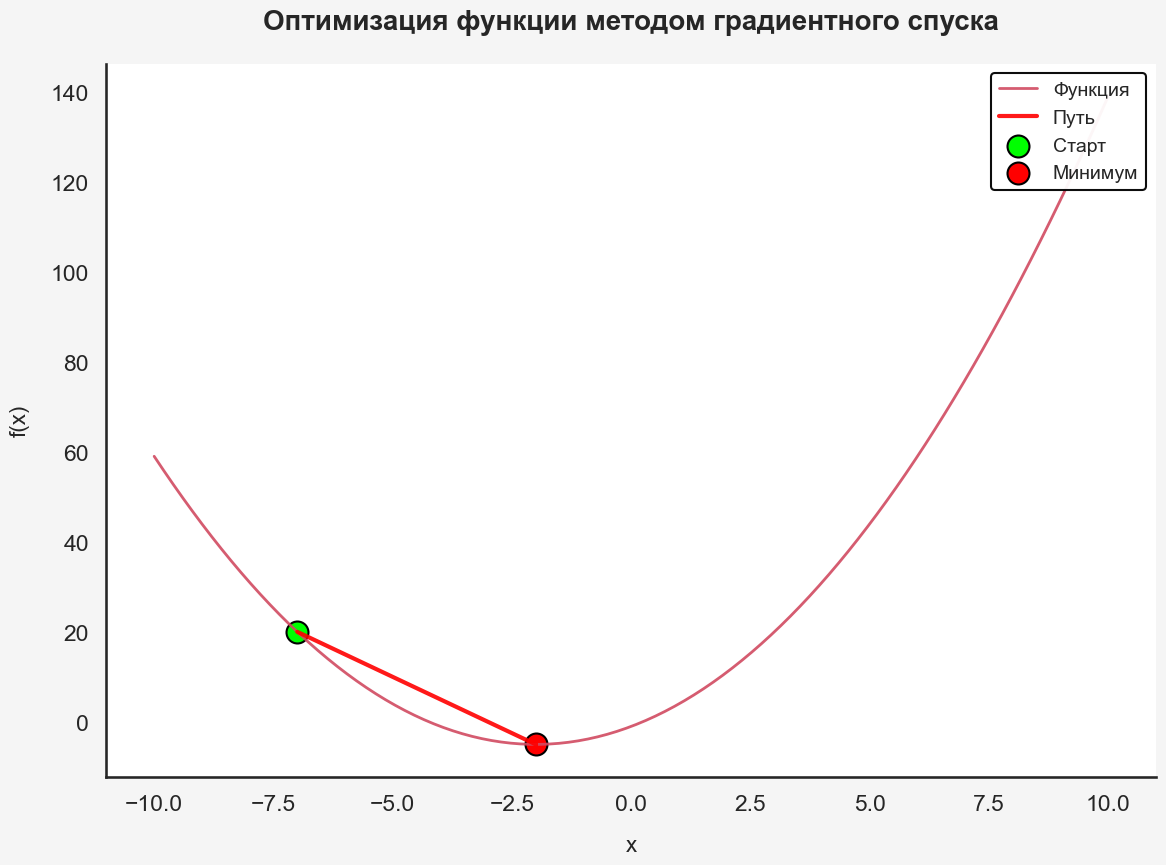

In [14]:
from gradient_descent import GradientDecent, SimpyWrapper
from graphics_plotter import GraphicsPlotter
from lrs import wolfe
import math

func = lambda x: x[0] ** 2 + 4 * x[0] - 1
    
bounds=[[-10, 10]]
descent1 = SimpyWrapper(func, bounds)
descent2 = GradientDecent(wolfe(0.0001, 0.4), func, bounds, 1e-9)

plotter1 = GraphicsPlotter(descent1)
plotter2 = GraphicsPlotter(descent2)

point=[-7]
iterations=1000

pretty_print(descent1, "simpy", descent1.find_min(point, iterations))
pretty_print(descent1, "wolfe", descent2.find_min(point, iterations))

plotter1.plot()
plotter2.plot()

На одномерных функциях наш метод абсолютно точно сходится с методом из библиотеки. Посмотрим ещё на табличку чтобы окончательно убедиться, что наш метод не хуже (а в чём-то даже и лучше чем библиотечный).

In [16]:
from gradient_descent import GradientDecent, SimpyWrapper
from lrs import wolfe

func = lambda x: x[0] ** 2 + 4 * x[0] - 1
    
bounds=[[-6, 6]]
descent1 = SimpyWrapper(func, bounds)
descent2 = GradientDecent(wolfe(0.0001, 0.4), func, bounds, 1e-9)

point=[-5]

print('{:12}| {:20}| {:20}|'.format('point', 'scipy', 'own'))
print(''.join(['-'*57]))
iter=10000
for i in range(15):
    point[0] += 0.4
    print('{:12}| {:20}| {:20}|'.format(
            '[{:.2}]'.format(point[0]), 
            str(descent1.find_min(point, iter)), 
            str(descent2.find_min(point, iter))
        )
    )

point       | scipy               | own                 |
---------------------------------------------------------
[-4.6]      | -4.999999999999446  | -4.999999999999954  |
[-4.2]      | -4.999999999999994  | -4.999999999999932  |
[-3.8]      | -5.0                | -4.999999999999913  |
[-3.4]      | -5.0                | -4.9999999999999885 |
[-3.0]      | -5.0                | -4.999999999999993  |
[-2.6]      | -5.0                | -4.999999999999845  |
[-2.2]      | -5.0                | -5.0                |
[-1.8]      | -5.0                | -5.0                |
[-1.4]      | -5.0                | -4.999999999999997  |
[-1.0]      | -5.0                | -4.999999999999993  |
[-0.6]      | -5.0                | -4.999999999999987  |
[-0.2]      | -5.0                | -5.0                |
[0.2]       | -4.999999999999964  | -5.0                |
[0.6]       | -4.999999999999865  | -5.0                |
[1.0]       | -4.999999999999962  | -4.999999999999999  |


Данная табличка только подтверждает, что наш метод очень хорош и мы проделали хорошую работу.

Вывод: Если должным образом изучить вопрос и ответственно отнестить к написанию кода, то можно написать неплохой аналог библиотечного метода, который можно будет настраивать под себя!